In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [4]:
stock = yf.Ticker("RELIANCE.NS") 
df = stock.history(period="1y")  
df.reset_index(inplace=True)
df.tail()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
244,2025-06-17 00:00:00+05:30,1448.000000,1448.000000,1425.800049,1431.199951,10366599,0.0,0.0
245,2025-06-18 00:00:00+05:30,1430.000000,1442.800049,1425.699951,1430.099976,6681735,0.0,0.0
246,2025-06-19 00:00:00+05:30,1430.099976,1439.900024,1425.699951,1433.300049,10007230,0.0,0.0
247,2025-06-20 00:00:00+05:30,1431.000000,1471.000000,1428.099976,1466.199951,29010635,0.0,0.0
248,2025-06-23 00:00:00+05:30,1453.000000,1463.800049,1442.000000,1456.800049,5988605,0.0,0.0


In [36]:
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['Daily Return'] = df['Close'].pct_change()
df['Volume Change'] = df['Volume'].pct_change()
df['Prediction'] = df[['Close']].shift(-1)


In [37]:
df.dropna(inplace=True)


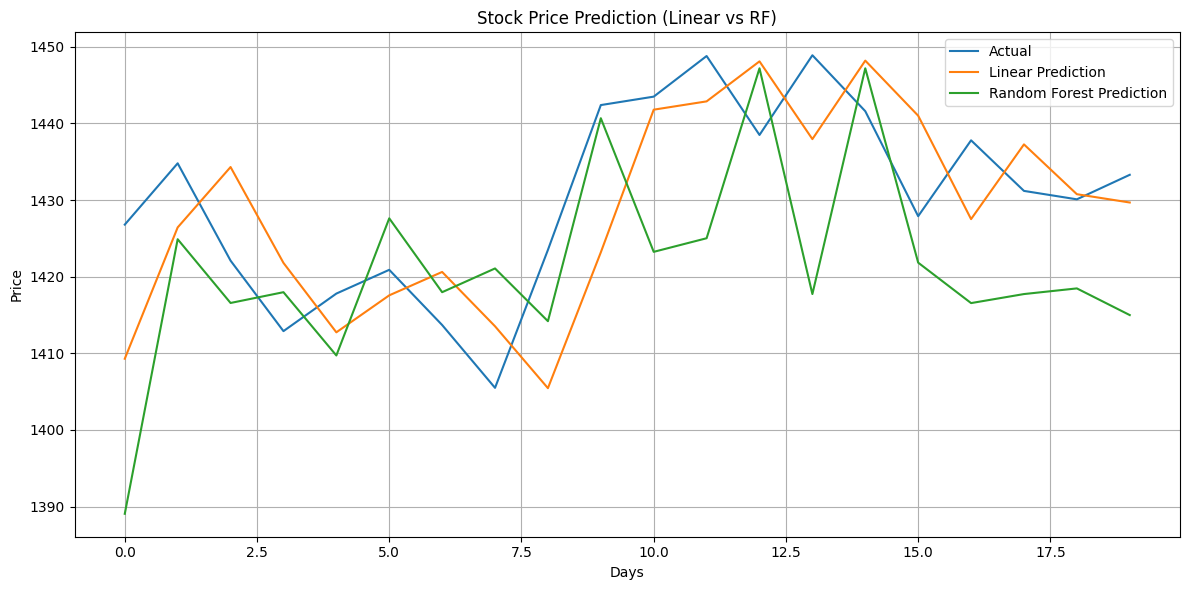

In [44]:
df['Prediction'] = df[['Close']].shift(-1)

X = np.array(df[['Close']])[:-1]
y = np.array(df['Prediction'])[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(pred_lr, label="Linear Prediction")
plt.plot(pred_rf, label="Random Forest Prediction")
plt.legend()
plt.title("Stock Price Prediction (Linear vs RF)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
print(f"Linear Regression MSE: {mean_squared_error(y_test, pred_lr)}")
print(f"Random Forest MSE: {mean_squared_error(y_test, pred_rf)}")

Linear Regression MSE: 103.5034350526926
Random Forest MSE: 261.61768856152395


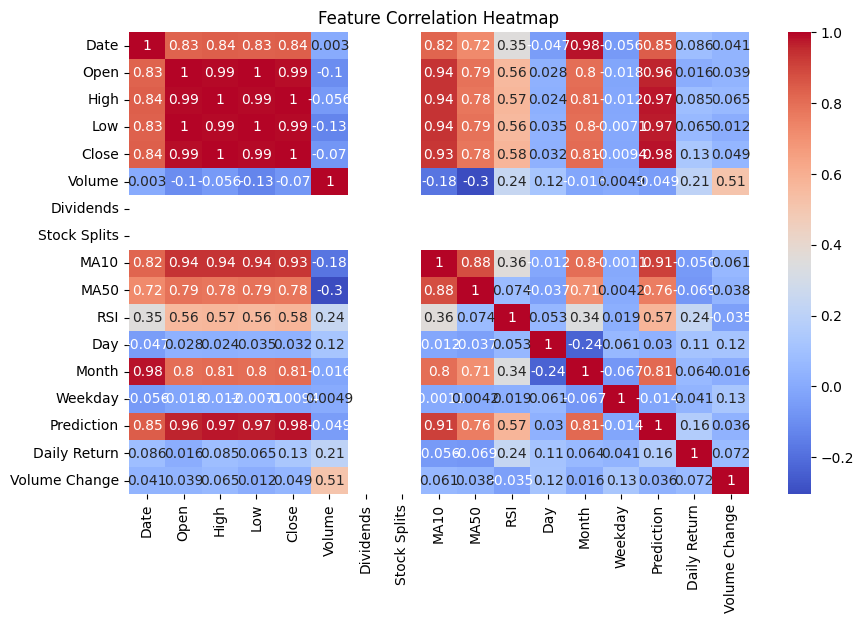

In [46]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
